In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import librosa
import librosa.display

import numpy as np
from matplotlib import pyplot as plt

from pathlib import Path

from IPython.display import Audio

import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # disable GPU devices
os.environ["TFDS_DATA_DIR"] = os.path.expanduser("~/tensorflow_datasets")  # default location of tfds database

import dpmhm
from dpmhm.datasets import transformer, preprocessing, feature, utils

2024-06-11 13:05:56.797599: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-11 13:05:56.803140: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-11 13:05:56.866830: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-11 13:05:57.751628: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
TFDS_DATA_DIR = os.path.expanduser('~/tensorflow_datasets/')

In [3]:
# !cd ~/Téléchargements
# !pwd
# !ls
# !unzip seuc.zip
# !mv Mechanical-datasets-master ../tmp/

In [4]:
_ = dpmhm.datasets.install('SEUC', 
                            data_dir=TFDS_DATA_DIR,                           
                            manual_dir=os.path.expanduser('~/tmp/Mechanical-datasets-master')
                          )

2024-06-11 13:05:59.853608: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-06-11 13:05:59.853644: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: is230816
2024-06-11 13:05:59.853658: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: is230816
2024-06-11 13:05:59.853827: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 535.171.4
2024-06-11 13:05:59.853865: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:169] kernel reported version is: 535.171.4
2024-06-11 13:05:59.853880: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:248] kernel version seems to match DSO: 535.171.4


In [5]:
dataset_name = 'seuc'

ds_all, ds_info = tfds.load(
    dataset_name, 
    data_dir=TFDS_DATA_DIR,
    # split=['train[:75%]', 'train[75%:]'],   
    # split=['all'],
    with_info=True,
    # batch_size=-1,  # load the whole dataset into a single batch
)

print(ds_all.keys())  # show the split of the raw dataset

ds0 = ds_all['gearbox']

dict_keys(['gearbox', 'bearing'])


In [6]:
ds0.cardinality().numpy()

10

In [7]:
ds0.element_spec

{'metadata': {'Dataset': TensorSpec(shape=(), dtype=tf.string, name=None),
  'FaultKind': TensorSpec(shape=(), dtype=tf.string, name=None),
  'FaultSize': TensorSpec(shape=(), dtype=tf.string, name=None),
  'FileName': TensorSpec(shape=(), dtype=tf.string, name=None),
  'LoadForce': TensorSpec(shape=(), dtype=tf.string, name=None),
  'OriginalSplit': TensorSpec(shape=(), dtype=tf.string, name=None)},
 'sampling_rate': TensorSpec(shape=(), dtype=tf.uint32, name=None),
 'signal': {'motor': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
  'parallel_x': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
  'parallel_y': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
  'parallel_z': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
  'planetary_x': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
  'planetary_y': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
  'planetary_z': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
  'torque': Tens

In [8]:
eles = list(ds0.take(ds0.cardinality().numpy()).as_numpy_iterator())

# for x, el in enumerate(eles):
#     print(el['metadata']['LoadForce'],el['metadata']['FileName'])

2024-06-11 13:06:00.425774: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


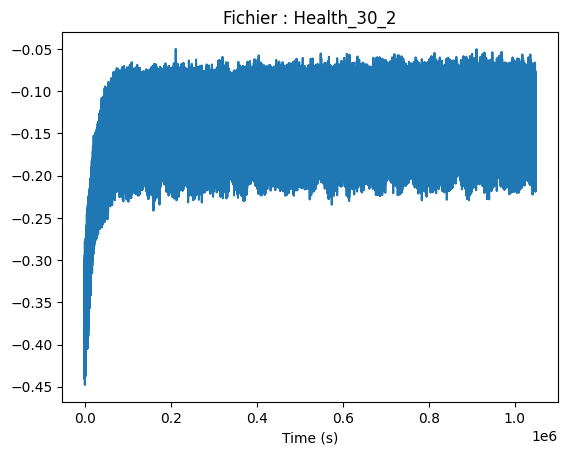

In [9]:
fn = eles[1]['metadata']['FileName'].decode()
x = eles[1]['signal']['motor']

plt.figure()
plt.plot(np.arange(len(x)), x)
plt.xlabel('Time (s)')
plt.title('Fichier : '+fn)

Audio(x, rate=10000)

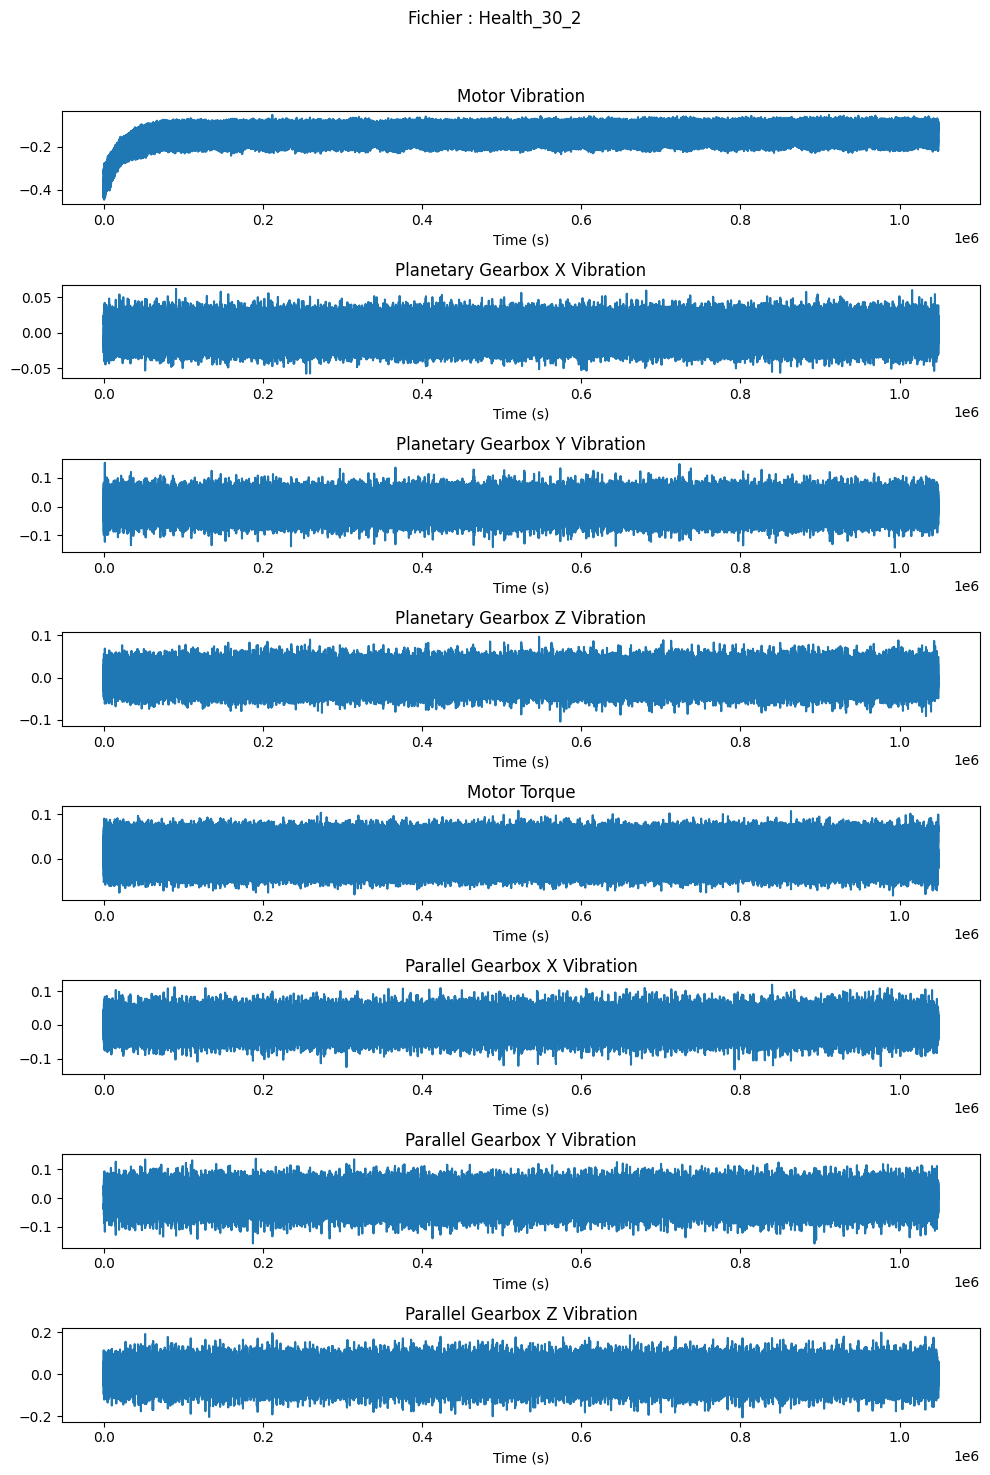

In [10]:
fig, axs = plt.subplots(8, 1, figsize=(10, 15))
fig.suptitle('Fichier : ' + fn)

signals=eles[1]['signal']

# Tracer les courbes
axs[0].plot(signals['motor'])
axs[0].set_title('Motor Vibration')
axs[0].set_xlabel('Time (s)')

axs[1].plot(signals['planetary_x'])
axs[1].set_title('Planetary Gearbox X Vibration')
axs[1].set_xlabel('Time (s)')

axs[2].plot(signals['planetary_y'])
axs[2].set_title('Planetary Gearbox Y Vibration')
axs[2].set_xlabel('Time (s)')

axs[3].plot(signals['planetary_z'])
axs[3].set_title('Planetary Gearbox Z Vibration')
axs[3].set_xlabel('Time (s)')

axs[4].plot(signals['torque'])
axs[4].set_title('Motor Torque')
axs[4].set_xlabel('Time (s)')

axs[5].plot(signals['parallel_x'])
axs[5].set_title('Parallel Gearbox X Vibration')
axs[5].set_xlabel('Time (s)')

axs[6].plot(signals['parallel_y'])
axs[6].set_title('Parallel Gearbox Y Vibration')
axs[6].set_xlabel('Time (s)')

axs[7].plot(signals['parallel_z'])
axs[7].set_title('Parallel Gearbox Z Vibration')
axs[7].set_xlabel('Time (s)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

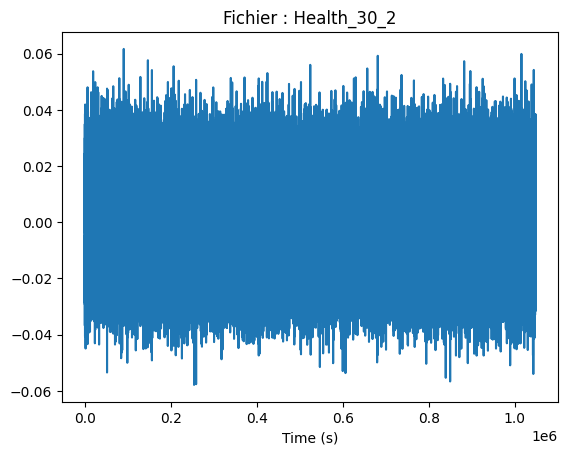

In [11]:
fn = eles[1]['metadata']['FileName'].decode()
x = eles[1]['signal']['planetary_x']

plt.figure()
plt.plot(np.arange(len(x)), x)
plt.xlabel('Time (s)')
plt.title('Fichier : '+fn)

Audio(x, rate=10000)

In [12]:
print(len(eles))

10


In [22]:
# Filter on the channels
channels = ['motor','planetary_x','planetary_y','planetary_z','torque','parallel_x','parallel_y','parallel_z']

# Label ramification
keys = ['FaultKind','FaultSize'] 

# Selection of domain
# filters = {'LoadForce': [0,1,2]}  # source domain
filters = {}  # no selection

# Resampling rate in Hz
resampling_rate = 10000  # no resampling

# Size of the sliding window (after resampling)
elem=list(ds0.take(5).as_numpy_iterator())
window_size = resampling_rate  # 1 second
# window_size = len(elem[0]['signal']['motor'])

# Number of samples to skip between sucessive window
hop_size = window_size//2

from dpmhm.datasets import transformer

compactor = transformer.DatasetCompactor(ds0.take(1), channels=channels, keys=keys, filters=filters,
                                         resampling_rate=resampling_rate, 
                                         window_size=window_size, hop_size=hop_size)

2024-06-11 13:12:45.962435: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [23]:
ds1 = compactor.dataset

print("Original:", ds0.element_spec['signal'])
print("Compacted:", ds1.element_spec['signal'])

Original: {'motor': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'parallel_x': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'parallel_y': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'parallel_z': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'planetary_x': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'planetary_y': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'planetary_z': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'torque': TensorSpec(shape=(None,), dtype=tf.float32, name=None)}
Compacted: TensorSpec(shape=(8, None), dtype=tf.float32, name=None)


2024-06-11 13:12:46.624833: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [24]:
eles0 = list(ds0.take(2).as_numpy_iterator())
eles1 = list(ds1.take(2).as_numpy_iterator())

ds1.element_spec

2024-06-11 13:12:46.925281: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-11 13:12:47.285956: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


{'label': TensorSpec(shape=(), dtype=tf.string, name=None),
 'sampling_rate': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'signal': TensorSpec(shape=(8, None), dtype=tf.float32, name=None)}

In [25]:
from dpmhm.datasets import feature

# Feature extractor

_func = lambda x, sr: feature.spectral_features(x, sr, 'spectrogram', 
                                                time_window=window_size/resampling_rate, hop_step=window_size/(resampling_rate*2), normalize=False,
                                                to_db=True)[0]
                                                
# _func = lambda x, sr: feature.spectral_features(x, sr, 'melspectrogram', 
#                                                 time_window=0.025, hop_step=0.0125, normalize=False,
#                                                 feature_kwargs={'n_mels':128})[0]

extractor = transformer.FeatureExtractor(compactor.dataset, _func)

In [26]:
ds2 = extractor.dataset
print(ds2.element_spec)

eles2 = list(ds2.take(2).as_numpy_iterator())

{'label': TensorSpec(shape=(), dtype=tf.string, name=None), 'feature': TensorSpec(shape=(8, None, None), dtype=tf.float32, name=None)}


/volatile/home/bm279471/Documents/.venv/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=16384 is too large for input signal of length=10000
  warnings.warn(
2024-06-11 13:12:47.728297: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


(8, 8193, 3)


Text(0, 0.5, 'Frequency bin')

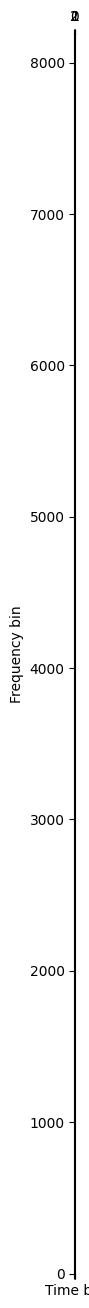

In [27]:
print(eles2[0]['feature'].shape)

X = eles2[0]
plt.matshow(X['feature'][0], origin='lower')
plt.xlabel('Time bin')
plt.ylabel('Frequency bin')